In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
import statistics
import matplotlib
from scipy import stats
%matplotlib inline

<font size="5"><b>Problem 1</b></font> 

A. The telescope we are observing gamma-ray sources with has a background of cosmic rays that follows a poisson distribution. This distribution is shown below.

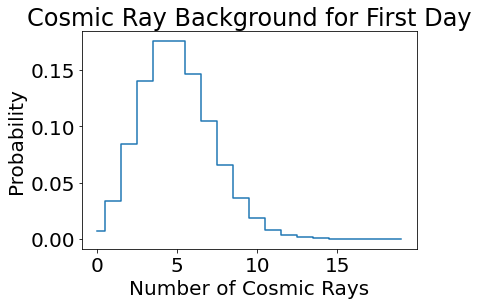

In [12]:
#Day 1 data
fig,ax, = plt.subplots(1,1)
plt.xlabel("Number of Cosmic Rays")
plt.ylabel("Probability")
plt.title("Cosmic Ray Background for First Day")
plt.rcParams.update({'font.size': 20})
cosmic = 5
distribution = poisson(cosmic)
x = np.arange(0,20)
day1 = distribution.pmf(x)
plt.step(x,day1,where = 'mid')

This shows the distribution for background data of day 1 measurements. Now I will show the background data several days after from convolution:

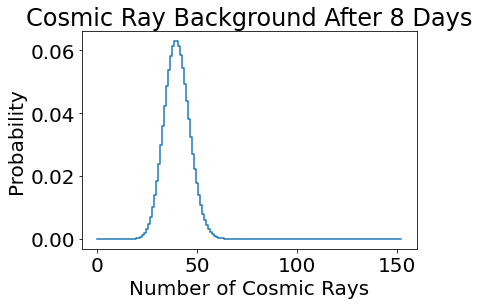

In [13]:
fig,ax, = plt.subplots(1,1)
plt.xlabel("Number of Cosmic Rays")
plt.ylabel("Probability")
plt.title("Cosmic Ray Background After 8 Days")
matplotlib.rcParams.update({'font.size': 22})
day2 = np.convolve(day1,day1)
day3 = np.convolve(day1,day2)
day4 = np.convolve(day1,day3)
day5 = np.convolve(day1,day4)
day6 = np.convolve(day1,day5)
day7 = np.convolve(day1,day6)
day8 = np.convolve(day1,day7)
x = np.arange(0,153)
plt.step(x,day8, where = 'mid')

B.

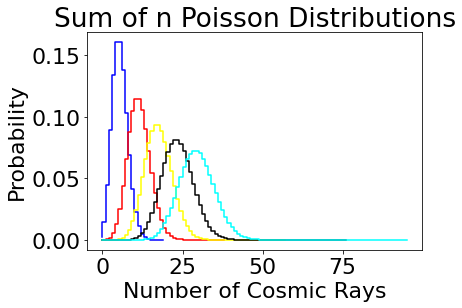

In [14]:
mu = 6
distribution = poisson(mu)
fig, ax = plt.subplots(1,1)
plt.title('Sum of n Poisson Distributions')
plt.ylabel('Probability')
plt.xlabel('Number of Cosmic Rays')
matplotlib.rcParams.update({'font.size': 22})
#one day
x = np.arange(0, 20)
day1 = distribution.pmf(x)
day1Plot = plt.step(x,day1,color='blue')

day2 = np.convolve(day1,day1)
x = np.arange(0,39)
day2Plot = plt.step(x,day2,color='red')

day3 = np.convolve(day1,day2)
x = np.arange(0,58)
day3Plot = plt.step(x,day3,color='yellow')

day4 = np.convolve(day1,day3)
x = np.arange(0,77)
day4Plot = plt.step(x,day4,color='black')

day5 = np.convolve(day1,day4)
x = np.arange(0,96)
day5Plot = plt.step(x,day5,color='cyan')

We can see that as we add more and more of the distributions (each representing the day), the overall distribution in cyan (shown above) appraoches a gaussian because it is more centered. However, this is still considered a poisson distribution because each individual distribution is still discrete, i.e. the measurements we are making with the gamma rays are discrete so the summed distribution will still be discrete. 

C.

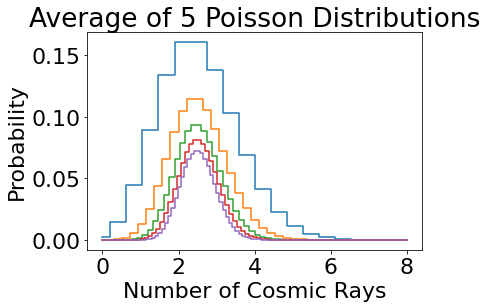

In [15]:
points = day1.size
def plt_avg(rng):
    fig,ax = plt.subplots(1,1)
    plt.xlabel('Number of Cosmic Rays')
    plt.ylabel('Probability')
    plt.title("Average of " + str(rng) + " Poisson Distributions")
    matplotlib.rcParams.update({'font.size': 22})
    avg = day1
    for i in range(rng):
        x = np.linspace(0,8,avg.size)
        ax.step(x,avg,where = 'mid')
        avg = np.convolve(avg,day1)
plt_avg(5)   

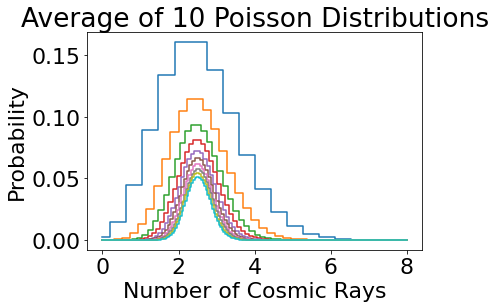

In [16]:
plt_avg(10)

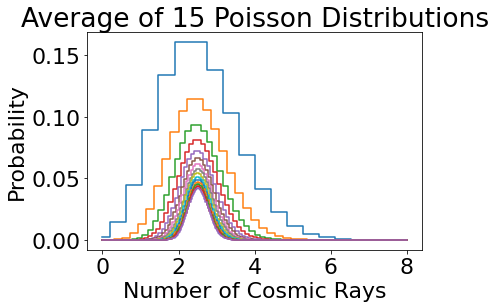

In [17]:
plt_avg(15)

This is a different result than problem b. We can see that averaging the distriution merely reduces the size of the peak, but it also makes the distribution more symmetric. Unlike in problem b, the distribution does not shift at all. This makes complete sense because the central limit theorm says that as we average the distribution more and more, it approaches the gaussian shape which is exactly what we see here. The top plot shows 5 distributions being averaged while the second plot shows 10 distributions averaged. We can see that the more distributions we average, the closer the shape approaches that familiar bell curve shape.

D.

In [9]:
N = 5
gamma = 7
gammaRays = N * gamma

x = np.linspace(0,50,51)
background = poisson.pmf(x,cosmic)
avg = background
for i in range(N):
    avg = np.convolve(avg,background)

each_prob = avg[0:gammaRays] 
prob = sum(each_prob)   #add all probabilities
sigma = norm.ppf(prob)
print("σ = " + str(sigma))

σ = 0.832045346715195


<font size="5"><b>Problem 2</b></font> 

A. I used Rayleigh distribution to check what happens to a skewed distribution as it is averaged with more Rayleigh distributions.

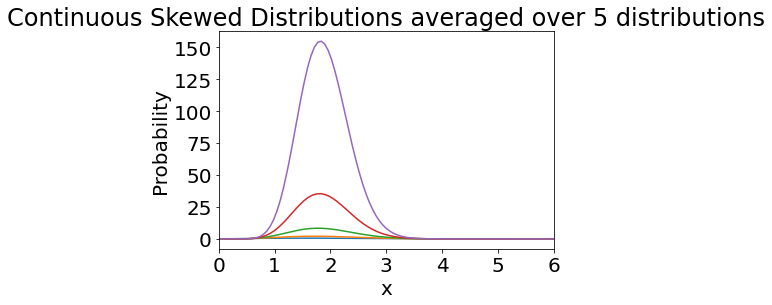

In [22]:
def plt_skew(high):
    fig,ax = plt.subplots(1,1)
    plt.xlim([0, 6])
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Continuous Skewed Distributions averaged over ' + str(high) + ' distributions')
    matplotlib.rcParams.update({'font.size': 15})
    x = np.linspace(0,10)
    distribution = rayleigh.pdf(x)
    avg = distribution
    for i in range(high):
        x1 = np.linspace(0,15,avg.size)
        ax.plot(x1,avg)
        avg = np.convolve(avg,distribution)
plt_skew(5)

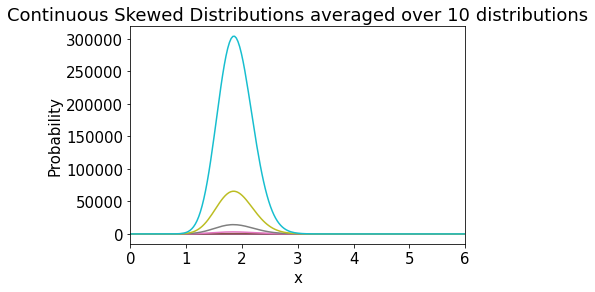

In [23]:
plt_skew(10)

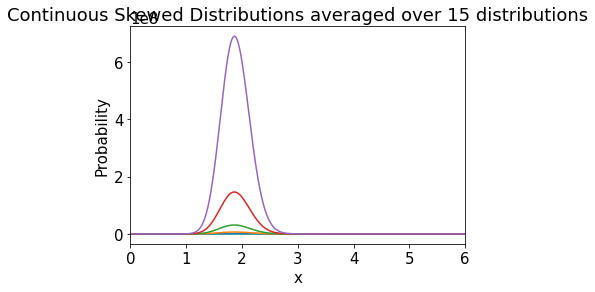

In [24]:
plt_skew(15)

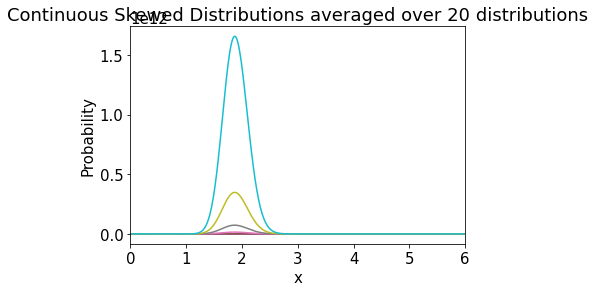

In [25]:
plt_skew(20)

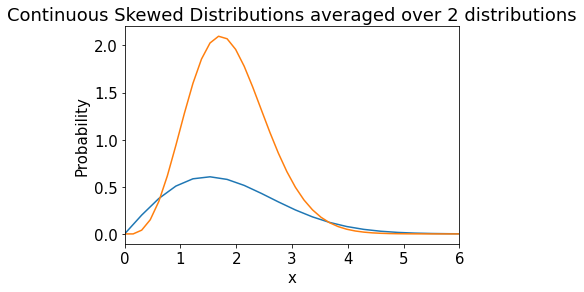

In [26]:
plt_skew(2)

B.

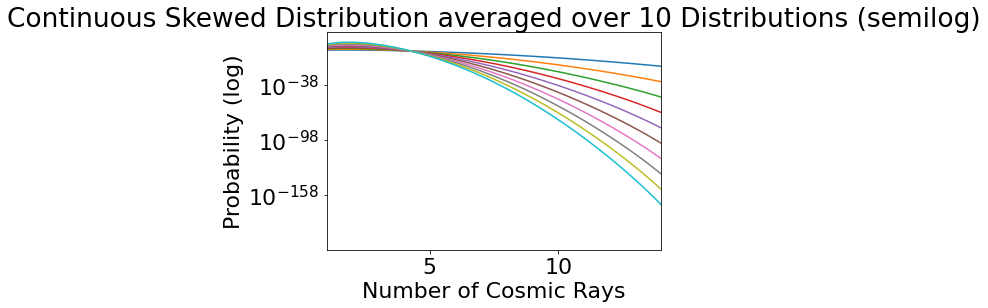

In [28]:
fig,ax = plt.subplots(1,1)
plt.xlim([1, 14])
plt.ylabel('Probability (log)')
plt.xlabel('Number of Cosmic Rays')
plt.title('Continuous Skewed Distribution averaged over 10 Distributions (semilog)')
matplotlib.rcParams.update({'font.size': 22})
x = np.linspace(0,10,100)
distribution = rayleigh.pdf(x)
avg = distribution
for i in range(10):
    x1 = np.linspace(0,15,avg.size)
    ax.semilogy(x1,avg)
    avg = np.convolve(avg,distribution)

We can see that as we average over more observing intervals (first 4 plots), the distribution approaches a symmetric bell curve shape. The second to last plot shows a familiar rayleigh shape (in blue) which has a long sweeping tail on the right and a short tail on the left side. However, even after one interval (orange above), the curve is very close to a gaussian shape. It seems that at around 10 observable intervals, the skew in the rayleigh distribution is almost completely gone. After this, adding more intervals looks like it increases the peak of the distribution. The last plot is a semilogy plot which shows the curvature progression over 10 distributions: we can see that long sweeing tail is curving down to become shorter and symmetric with the other side.

<font size="5"><b>Problem 3</b></font> 

In this problem, we are using an optical telescope with thermal noise background from the CCD. This background is a zero mean gaussian distribution with constant width.

<font size="5"><b>Version 1</b></font> 

The background distribution is a gaussian. To find the probability that the background produced this signal, we want to use cdf() function. This will integrate from positive infinity to that point. But it would make more sense to integrate from the point to infinity so a solution to this is to simply subtract the probability from 1. In this case, we measured the width of the gaussian to be X = 4 and the strength of the signal we saw is Y = 4.8. We need to calculate how significant this discovery is.

In [49]:
X = 4 #width
Y = 4.8  #strength (float)
#significant discovery is 5 sigma or more
f = norm.cdf(Y,scale=X)
probability = 1-f
probability

0.11506967022170822

This is the probability that a certain measurement is greater than 4.8. Next we will use this probability to find the sigma value using the normal distribution:

In [50]:
abs(norm.ppf(probability))

1.2000000000000004

This value is less than the 5σ threshold, so this is not a discovery.

<font size="5"><b>Version 2</b></font> 

B.

We know that the background is a zero mean gaussian with constant width and the sky data consists of 10k pixels. We need to find a signal in 10k pixels, so we can consider the 10k pixels as the background distribution. Therefore we can ask the statistical question:what is the probability distribution of 10k pixels? We can 

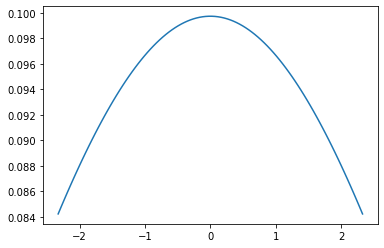

In [56]:
def plt_background(pixels):
    fig,ax = plt.subplots(1,1)
    plt.ylabel('Probability')
    plt.xlabel('x')
    plt.title('Background Probability Distribution of Cosmic Rays')
    
    X = 4 #width
    Y = 4.8  #signal strength (float)
    
    x = np.linspace(norm.ppf(0.01),norm.ppf(0.99),100)
    probability = norm.pdf(x,scale=X)
    prob = pixels * probability #probability of 10k pixels
    
    ax.plot(x,prob)
plt_background(1)

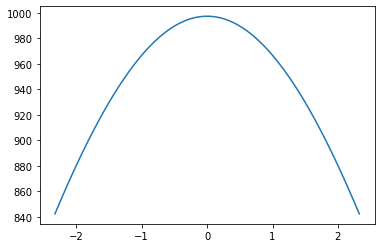

In [57]:
plt_background(10000)

C. Taking my brightest candidate (4.8), let's calculate the significance:

In [60]:
prob_signal = norm.cdf(4.8,scale=X)/10000 #get one pixel
sigma = norm.ppf(prob_signal)
abs(sigma)

5.598993832549697

3.75σ is less than the 5σ threshold so this is not considered a discovery 

<font size="5"><b>Problem 4</b></font> 

We will now begin to understand the trials factor problem. Specifically, we will analyze one signal in many events.

A. Firstly, we will calculate the sigma value needed for 5 sigma detection in version 1:

In [46]:
prob5_1 = norm.cdf(5) #probability for 5sigma in version1
signal1 = norm.ppf(prob5_1,scale=X)
print(signal1)

19.999999999880703


B. Verfiying this value in version 1, and we get a sigma value of ~5. So ~20 is the signal strenght needed for discovery. Next, we are to calculate the strength of second signal among 10000 pixels:

In [62]:
#for version 2, we need to divide by 10000 to get signal from one pixel
prob5_2 = norm.cdf(5)/10000
signal2 = norm.ppf(prob5_2,scale=X)
abs(signal2)

14.87606623148101

C.

In [63]:
ratio = signal2/signal1
abs(ratio)

0.7438033115784871

The signal strength of the signal in 10k pixels is 74% the strength of a 1 signal pixel. So the signal would need to be 26% brighter to be discoverable. The sensitivity penalty could be low because the distributions are so similar. We know that 5σ is about 1 in 3.5 millions events, so dividing by 10000 pixels should not change the magnitude that much.

D. If we use a trials factor of 1000000, let's see the effect on the 5σ threshold.

In [68]:
prob = norm.cdf(5)/100000
signal3 = norm.ppf(prob,scale=X)

ratio = signal3/signal1
abs(ratio)

0.8529781715902198

This is 85% of the signal required for discovery. So two orders of magnitude increase the brightness by about ~11%